# Predict Customer churn

# Load and take a look at the data

In [37]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Load data
ds=pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [39]:
ds.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [40]:
ds.shape

(3333, 21)

In [41]:
ds.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

# Check and treat null values

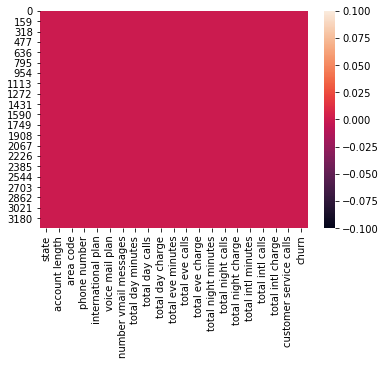

In [42]:
sns.heatmap(ds.isnull())

In [43]:
ds.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

# Check correlation

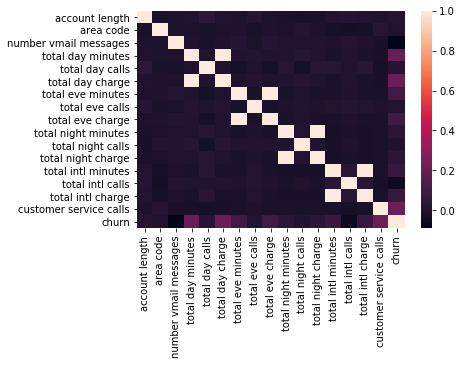

In [44]:
dscor=ds.corr()
sns.heatmap(dscor)

In [45]:
ds.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Best correlation to target column with:
    total day minutes,total day charge,customer service calls
Next:
    total eve minutes, total eve charge, total intl minutes,total intl charge
Then:
    total night minutes,total night charge,account length, area code
The rest correlate poorly

# Summary statistics

In [46]:
ds.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The number of vmail messages column has a very high standard deviation but as that column correlates poorly it will be dropped later.

# Data visualizations

In [47]:
ds.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

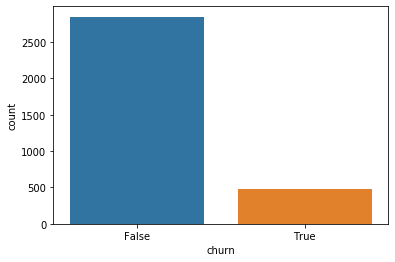

In [48]:
sns.countplot(ds['churn'])

The company retains customers at a ratio of roughly 6:1.

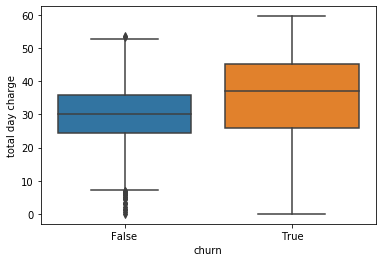

In [49]:
sns.boxplot(x='churn',y='total day charge',data=ds)

Higher day charge correlates with higher churn.

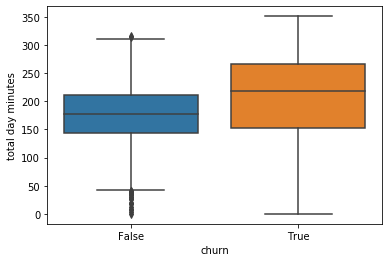

In [50]:
sns.boxplot(x='churn',y='total day minutes',data=ds)

Higher total day minutes correlates with higher churn.

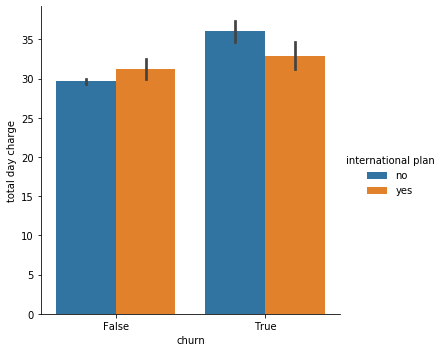

In [51]:
sns.catplot(x='churn', y= 'total day charge', hue='international plan', data=ds, kind='bar')

The international day charge is higher for customers who leave, but it is even higer for customers who do not have the international plan.

# Check eveness of dataset

In [52]:
ds.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [53]:
churn_counts = ds['churn'].value_counts()
churn_counts

False    2850
True      483
Name: churn, dtype: int64

In [54]:
churn_percentage = ds['churn'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
churn_percentage

False    85.5%
True     14.5%
Name: churn, dtype: object

The data is not distributed evenly over the target column. Will have to stratify the train_test split on churn.

# Encode categorical columns to numeric values

In [55]:
eds=ds

In [56]:
eds.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [57]:
eds.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [58]:
# Change categorical data to numerical data for 2 categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['state','international plan', 'voice mail plan', 'churn']
for col in cols:
    eds[col] = le.fit_transform(eds[col])

In [59]:
eds.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Check correlation after encoding

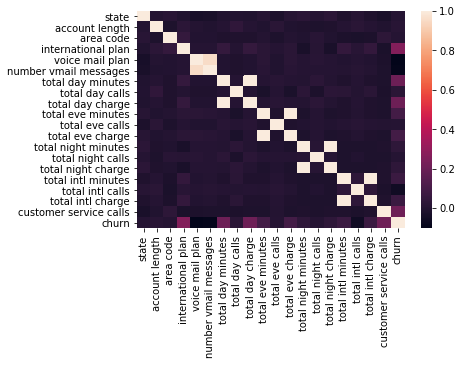

In [60]:
dscor=eds.corr()
sns.heatmap(dscor)

Best correlation to target column with:
    international plan, total day minutes,total day charge,customer service calls
Next:
    total eve minutes, total eve charge, total intl minutes,total intl charge
Then:
    total night minutes,total night charge,account length, area code
The rest correlate poorly

# Drop irrelevant columns

In [61]:
eds.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [62]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=ds.drop(columns=['state', 'account length', 'area code', 'phone number',
       'voice mail plan', 'number vmail messages',
       'total day calls', 'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge'])

# Find and remove outliers

In [63]:
nds.shape

(3333, 5)

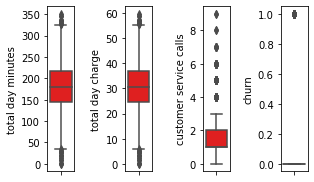

In [64]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=5
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [65]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(3333, 5)
(2970, 5)


# Check and adjust skewness

Churn is a boolean and skewness cannot be adjusted.

# Split data into x and y

In [66]:
cds.columns

Index(['international plan', 'total day minutes', 'total day charge',
       'customer service calls', 'churn'],
      dtype='object')

In [67]:
# Lineup target and input values
cds_x=cds.drop(columns=['churn'])
y=cds[['churn']]

# Apply scaler

In [69]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(cds_x)
x=pd.DataFrame(x,columns=cds_x.columns)

In [70]:
x.skew()

international plan        0.000000
total day minutes         0.006686
total day charge          0.006668
customer service calls    0.727677
dtype: float64

# Train-Test split

In [71]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20, stratify=cds['churn'])

# Model

In [72]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
# Using GridSearchCV to select the best parameter

In [76]:
# best parameters for logistic Regression

from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [77]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [78]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,30)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 30}

In [79]:
# Logistic Regression and binary classification methods

In [80]:
KNN=KNeighborsClassifier(n_neighbors= 30)

LR=LogisticRegression(penalty='l2')
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?
GNB=GaussianNB()

In [81]:
models=[]
models.append(('KneighborsClassifier',KNN))

models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')



Accuracy score = 0.9090909090909091


cross validation score = 0.9033670033670033


roc_auc_score =  0.6183510251563182


classification_report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       529
           1       0.76      0.25      0.37        65

    accuracy                           0.91       594
   macro avg       0.84      0.62      0.66       594
weighted avg       0.90      0.91      0.89       594



[[524   5]
 [ 49  16]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* LogisticRegression *************************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l

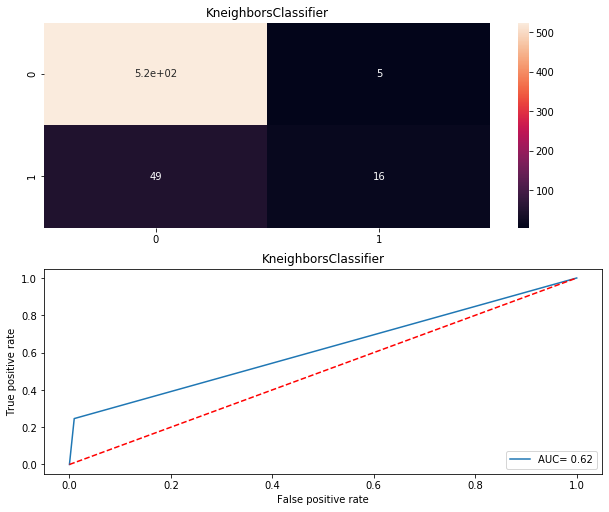

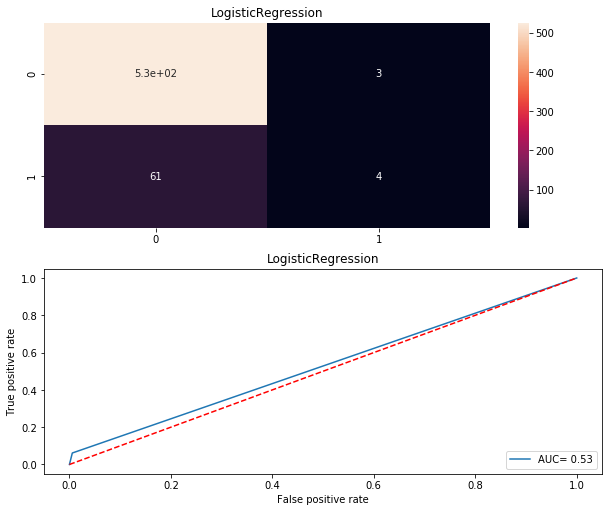

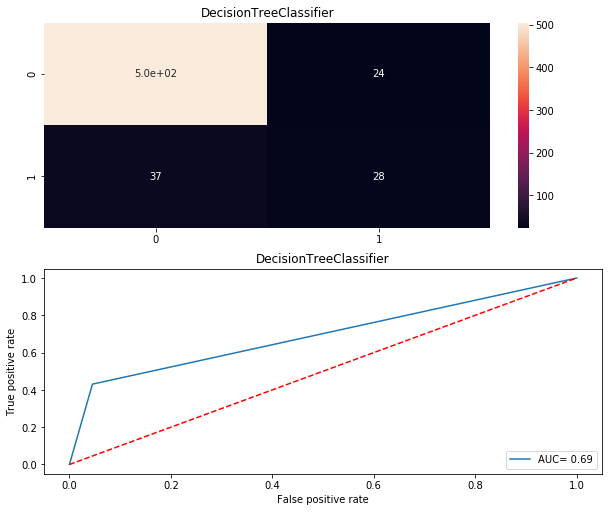

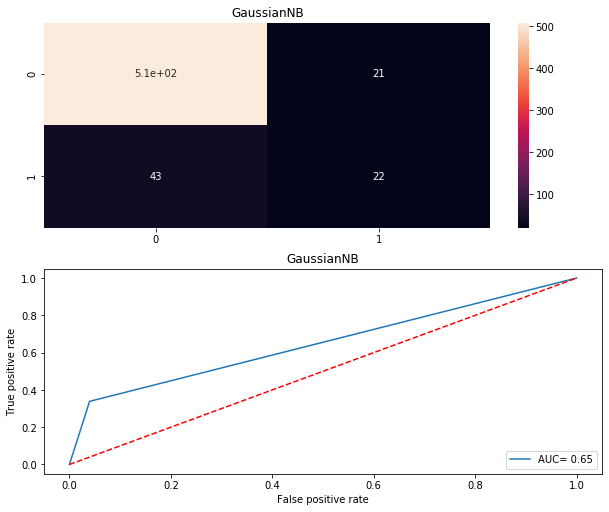

In [82]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,cds_x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')

In [83]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KneighborsClassifier,90.909091,90.336700,61.835103
1,LogisticRegression,89.225589,89.124579,52.793369
2,DecisionTreeClassifier,89.730640,88.013468,69.270031
3,GaussianNB,89.225589,89.259259,64.938200


In [84]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9006734006734006
[[508  21]
 [ 38  27]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       529
           1       0.56      0.42      0.48        65

    accuracy                           0.90       594
   macro avg       0.75      0.69      0.71       594
weighted avg       0.89      0.90      0.89       594



In [85]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8939393939393939
[[518  11]
 [ 52  13]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       529
           1       0.54      0.20      0.29        65

    accuracy                           0.89       594
   macro avg       0.73      0.59      0.62       594
weighted avg       0.87      0.89      0.87       594



In [86]:
# Use Gradient Boosting technique with GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbr=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters, cv=5)
clf.fit(cds_x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [87]:
gbr=GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 1000,random_state=42)
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print(accuracy_score(y_test,predgbr))
print(confusion_matrix(y_test,predgbr))
print(classification_report(y_test,predgbr))

0.9141414141414141
[[520   9]
 [ 42  23]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       529
           1       0.72      0.35      0.47        65

    accuracy                           0.91       594
   macro avg       0.82      0.67      0.71       594
weighted avg       0.90      0.91      0.90       594



In [88]:
from sklearn.svm import SVC
# Perform Support Vector Machine classification and check it's accuracy
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9006734006734006
[[522   7]
 [ 52  13]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       529
           1       0.65      0.20      0.31        65

    accuracy                           0.90       594
   macro avg       0.78      0.59      0.63       594
weighted avg       0.88      0.90      0.88       594



I choose the GradientBoostingClassifier model as my final model because it gives the best scores.

Accuracy score = 91.4 Precision = 93.0 Recall = 98.0

# Save the model

In [90]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(gbr,'Churn.pkl')

['Churn.pkl']

In [91]:
# Load and use model to make a prediction
model=joblib.load('Churn.pkl')
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,